In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt #plotting
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (15,10) #Set the default figure size
plt.style.use('ggplot') #Set the plotting method

In [4]:
from sklearn.model_selection import train_test_split #Split the data into train and test
from sklearn.ensemble import RandomForestClassifier #Forest for prediction and regression
from sklearn.metrics import mean_squared_error #Error testing
from sklearn.metrics import classification_report #Report of Classification

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
milkData = pd.read_csv("/content/drive/MyDrive/Milk Grading.csv") #Get the milk dataset
milkData.head() #Take a peek at the milk

,pH,Temprature,Taste,Odor,Grade
0,6.6,35,1,0,1.0
1,6.6,36,0,1,1.0
2,8.5,70,1,1,0.0
3,9.5,34,1,1,0.0
4,6.6,37,0,0,0.5


In [7]:
print(milkData.isnull().any()) #Check for null values

pH            False
Temprature    False
Taste         False
Odor          False
Grade         False
dtype: bool


In [8]:
milkData["gradeWord"] = milkData["Grade"].apply(lambda x: "Good" if x==1 else ("Moderate" if x==0.5 else "Bad") ) #Put the grade into words
milkData.head() #Take a peek at the dataset

,pH,Temprature,Taste,Odor,Grade,gradeWord
0,6.6,35,1,0,1.0,Good
1,6.6,36,0,1,1.0,Good
2,8.5,70,1,1,0.0,Bad
3,9.5,34,1,1,0.0,Bad
4,6.6,37,0,0,0.5,Moderate


In [9]:
print(len(milkData.index)) #Check the number of rows

1059


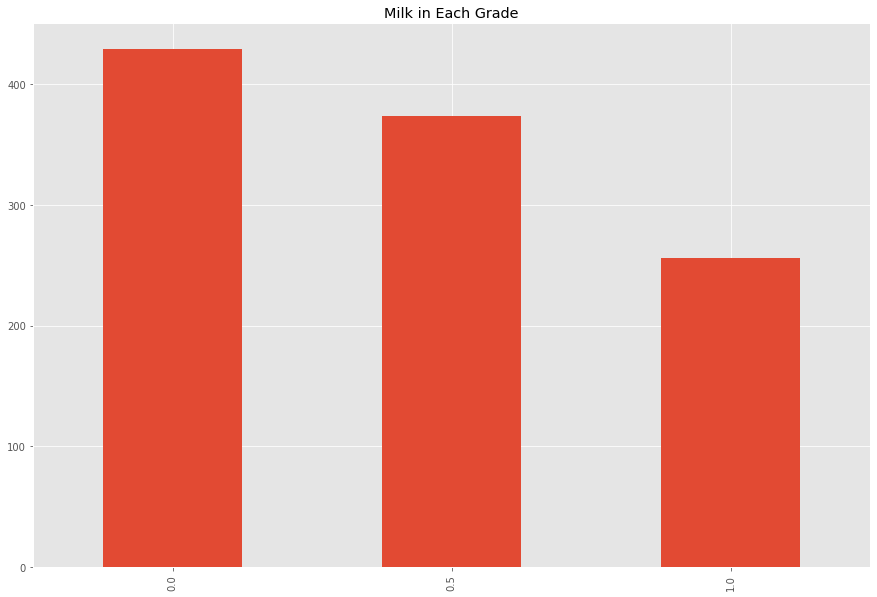

In [10]:
milkData["Grade"].value_counts().plot.bar(title = "Milk in Each Grade") #Plot the number of instances of each grade

In [11]:
rangeValues = ["Temprature", "pH"] #Get the columns that are ranged values

In [12]:
#For each ranged value column, print the range of the column (min and max)
for column in rangeValues:
    #Print the range for these columns that have ranges
    print(column, "Range: ", milkData[column].unique().min(), "-", milkData[column].unique().max())

Temprature Range:  34 - 90
pH Range:  3.0 - 9.5


In [13]:
gradeType = ["Good", "Moderate", "Bad"] #Get the word names for the different grades

In [14]:
#For each grade, get the subset of the dataset for that grade and get its pH/Temp ranges
for grade in gradeType:
    subset = milkData.loc[milkData["gradeWord"] == grade] #Get the subset of the data for the specific grade
    
    #For each ranged value column, print the range of the column (min and max) per each grade
    for column in rangeValues:
        #Print the range for these columns that have ranges
        print(grade, column, "Range: ", subset[column].unique().min(), "-", subset[column].unique().max())

Good Temprature Range:  35 - 45
Good pH Range:  6.5 - 6.8
Moderate Temprature Range:  34 - 45
Moderate pH Range:  6.4 - 6.8
Bad Temprature Range:  34 - 90
Bad pH Range:  3.0 - 9.5


In [15]:
#GetChara: Get the most important characteristics to the classification
#Input: the characteristics, the model
#Output: None
def getChara(characteristics, forest):
    attributes = characteristics.columns #Get the tested attributes
    attributes = list(zip(attributes, forest.feature_importances_)) #Zip the attributes together with their coefficient
    sortAtt = sorted(attributes, key = lambda x: x[1], reverse = True) #Sort the zipped attributes by their coefficients

    print("According to the Random Forest, the most important factors for milk grade are: ") #Start printing the most important labels
    i = 0 #Counter variable so only the top five are printed

    #For each attribute in the sorted attributes
    for label, coef in sortAtt:
        if i < 7: #If there has not been five printed yet
            print(label) #Print the label as an important factor
        i += 1 #Increase i by 1

In [16]:
def classifyMilk(milk, labels):
    grade = milk["gradeWord"].copy() #Get the grades as our classification metric
    grade = pd.get_dummies(grade) #Get dummies for the grade metric
    print(grade)

    characteristics = milk.drop(columns = {"Grade", "gradeWord"}).copy() #Get the characteristics used for classification
    charaTrain, charaTest, gradeTrain, gradeTest = train_test_split(characteristics, grade, test_size = 0.2) #Split the dataset
    
    forest = RandomForestClassifier(n_estimators = 100) #Build a forest
    forest.fit(charaTrain, gradeTrain) #Fit the forest model
    
    predict = forest.predict(charaTest) #Get a list of predictions
    
    print("Forest Accuracy: ", forest.score(charaTest, gradeTest)) #Print the accuracy
    print("Root Mean Square Error: ", np.sqrt(mean_squared_error(gradeTest, predict))) #Print the root mean square error
    print("Classification Report:\n ", classification_report(gradeTest, predict, target_names = labels)) #Print a classification report
    
    getChara(characteristics, forest) #Get the important Characteristics

In [17]:
grade = ["Bad", "Good", "Moderate"] #Get the grades in order
classifyMilk(milkData, grade) #Classify on the whole dataset

      Bad  Good  Moderate
0       0     1         0
1       0     1         0
2       1     0         0
3       1     0         0
4       0     0         1
...   ...   ...       ...
1054    0     0         1
1055    0     1         0
1056    1     0         0
1057    0     1         0
1058    1     0         0

[1059 rows x 3 columns]
Forest Accuracy:  0.9905660377358491
Root Mean Square Error:  0.0793051585718144
Classification Report:
                precision    recall  f1-score   support

         Bad       1.00      1.00      1.00        90
        Good       0.96      1.00      0.98        46
    Moderate       1.00      0.97      0.99        76

   micro avg       0.99      0.99      0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212
 samples avg       0.99      0.99      0.99       212

According to the Random Forest, the most important factors for milk grade are: 
pH
Temprature
Odor
Taste


In [18]:
import pickle
from joblib import dump, load

dump(grade, 'model.joblib') 

['model.joblib']

In [19]:
s = pickle.dumps(grade)

In [20]:
grade_model = pickle.loads(s)